In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

2024-10-18 09:06:38.041232: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-18 09:06:38.041348: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-18 09:06:38.166788: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# GPU utilization

In [2]:
phy_device = tf.config.experimental.list_physical_devices('GPU')

In [3]:
if phy_device:
    try:
        tf.config.experimental.set_memory_growth(phy_device[0], True)
        print('GPU is Available.')
    except RunTimeError as e:
        print(e)
else:
    print('GPU is not Available')

GPU is Available.


# For File management

In [4]:
import os 
import shutil

**OS:**
Provide Functions for interacting with the Operating System.

**Shutil:**
Offers high-level file and directory operations

# Dataset Path

In [5]:
model = '/kaggle/input/disaster-images-dataset-cnn-model'

# Directory creation

In [6]:
cyclone = r'/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/cyclone'
earthquake = r'/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/earthquake'

In [7]:
flood = r'/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/flood'
wildfire = r'/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/wildfire'

In [8]:
len(cyclone), len(earthquake), len(flood), len(wildfire)

(69, 72, 67, 70)

In [9]:
import os

def directory_contains_files(directory_path):

  try:
    files = os.listdir(directory_path)
    return len(files) > 0
  except FileNotFoundError:
    return False

# Example usage:
directory_path = "/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel/earthquake"
if directory_contains_files(directory_path):
  print("Directory contains files")
else:
  print("Directory is empty or does not exist")


Directory is empty or does not exist


# Define Paths

In [10]:
train = os.path.join(model, 'trian')
validation = os.path.join(model, 'validation')
test = os.path.join(model, 'test')

In [11]:
train_dir_c = os.path.join(model, 'cyclone')
train_dir_e = os.path.join(model, 'earthquake')
train_dir_f = os.path.join(model, 'flood')
train_dir_w = os.path.join(model, 'wildfire')

In [12]:
validation_dir_c = os.path.join(model, 'cyclone')
validation_dir_e = os.path.join(model, 'earthquake')
validation_dir_f = os.path.join(model, 'flood')
validation_dir_w = os.path.join(model, 'wildfire')

In [13]:
test_dir_c = os.path.join(model, 'cyclone')
test_dir_e = os.path.join(model, 'earthquake')
test_dir_f = os.path.join(model, 'flood')
test_dir_w = os.path.join(model, 'wildfire')

In [14]:
create_dirs = False

# Conditionally Creating A Directory Structure For Image Dataset.

In [15]:
if create_dirs:
    os.mkdir(train)
    os.mkdir(validation)
    os.mkdir(test)
    os.mkdir(train_dir_c)
    os.mkdir(train_dir_e)
    os.mkdir(train_dir_f)
    os.mkdir(train_dir_w)
    os.mkdir(validation_dir_c)
    os.mkdir(validation_dir_e)
    os.mkdir(validation_dir_f)
    os.mkdir(validation_dir_w)
    os.makdir(test_dir_c)
    os.mkdir(test_dir_e)
    os.mkdir(test_dir_f)
    os.mkdir(test_dir_w)
    
copy_images = False

In [16]:
if copy_images:

    #TRAIN
    
    names = ['{}.jpg'.format(i) for i in range(400)]
    for name in names:
        source = os.path.join(cyclone_dir, name)
        destination = os.path.join(train_dir_c, name)
        shutil.copyfile(source, destination)
    names = ['{}.jpg'.format(i) for i in range(400)]
    for name in names:
        source = os.path.join(earthquake_dir, name)
        destination = os.path.join(train_dir_e, name)
        shutil.copyfile(source, destination)
    names = ['{}.jpg'.format(i) for i in range(400)]
    for name in names:
        source = os.path.join(flood_dir, name)
        destination = os.path.join(train_dir_f, name)
        shutil.copyfile(source, destination)
    names = ['{}.jpg'.format(i) for i in range(400)]
    for name in names:
        source = os.path.join(wildfire_dir, name)
        destination = os.path.join(train_dir_w, name)
        shutil.copyfile(source, destination)
        
        #VALIDATION
        
    names = ['{}.jpg'.format(i) for i in range(400)]
    for name in names:
        source = os.path.join(cyclone, name)
        destination = os.path.join(validation_dir_c, name)
        shutil.copyfile(source, destination)
    names = ['{}.jpg'.format(j) for j in range(400)]
    for name in names:
        source = os.path.join(earthquake, name)
        destination = os.path.join(validation_dir_e, name)
        shutil.copyfile(source, destination)
    names = ['{}.jpg'.format(k) for k in range(400)]
    for name in names:
        source = os.path.join(flood, name)
        destination = os.path.join(flood_dir_f, name)
        shutil.copyfile(source, destination)
    name = ['{}.jpg'.format(l) for l in range(400)]
    for name in names:
        source = os.path.join(wildfire, name)
        destination = os.path.join(wildfire_dir_w, name)
        shutil.copyfile(source, destination)
        
    #TEST
    name = ["{}.jpg".format(i) for i in range(400)]
    for name in names:
        source = os.path.join(cyclone, name)
        destination = os.path.join(test_dir_c)
        shutil.copyfile(source, destination)
    name = ["{}.jpg".format(j) for j in range(400)]
    for name in names:
        source = os.path.join(earthquake, name)
        destination = os.path.join(test_dir_e)
        shutil.copyfile(source, destination)
    name = ["{}.jpg".format(k) for k in range(400)]
    for name in names:
        source = os.path.join(flood, name)
        destination = os.path.join(test_dir_f, name)
        shutil.copyfile(source, destination)
    name = ["{}.jpg".format(l) for l in range(400)]
    for name in names:
        source = os.path.join(wildfire, name)
        destination = os.path.join(test_dir_w, name)
        shutil.copyfile(source, destination)
        

In [17]:
from PIL import Image
import random
from builtins import RuntimeError


In [18]:
main_dir = '/kaggle/input/disaster-images-dataset-cnn-model/DisasterModel'

In [19]:
def load_images_from_subdirs(main_dir):
    images = []
    labels = []
    validation_extensions = ('.png', '.jpg', '.jpeg', '.tif', '.tiff')

    for subdir in ['train', 'validation', 'test']:
        subdir_path = os.path.join(main_dir, subdir)
        if not os.path.exists(subdir_path):
            print(f"Subdirectory doesn't exist{subdir_path}")
            continue
        for category in os.listdir(subdir_path):
            category_path = os.path.join(subdir_path, category)  
            if not os.path.isdir(category_path):
                continue
            for filename in os.listdir(category_path):
                if filename.lower().endswith(validation_extensions):
                    img_path = os.path.join(category_path, filename)
                    try:
                        img = Image.open(img_path)
                        img = img.convert('RGB')
                        img = img.resize((224, 224))
                        img_array = np.array(img)
                        images.append(img_array)
                        labels.append(category)
                    except RunTimeError as e:
                        print(f'Error Loading Image{filename}:{str(e)}')
    return np.array(images), labels


# Loading The Images

In [20]:
images, labels = load_images_from_subdirs(main_dir)

print(f"The Images Loaded: {len(images)}")
print(f"The Unique Categories: {set(labels)}")



The Images Loaded: 2400
The Unique Categories: {'wildfire', 'cyclone', 'earthquake', 'flood'}


In [21]:
num_images = 5

def visualize_random_images(images, labels, num_images = 5):
    if len(images) == 0:
        print("No Images Available")
        return

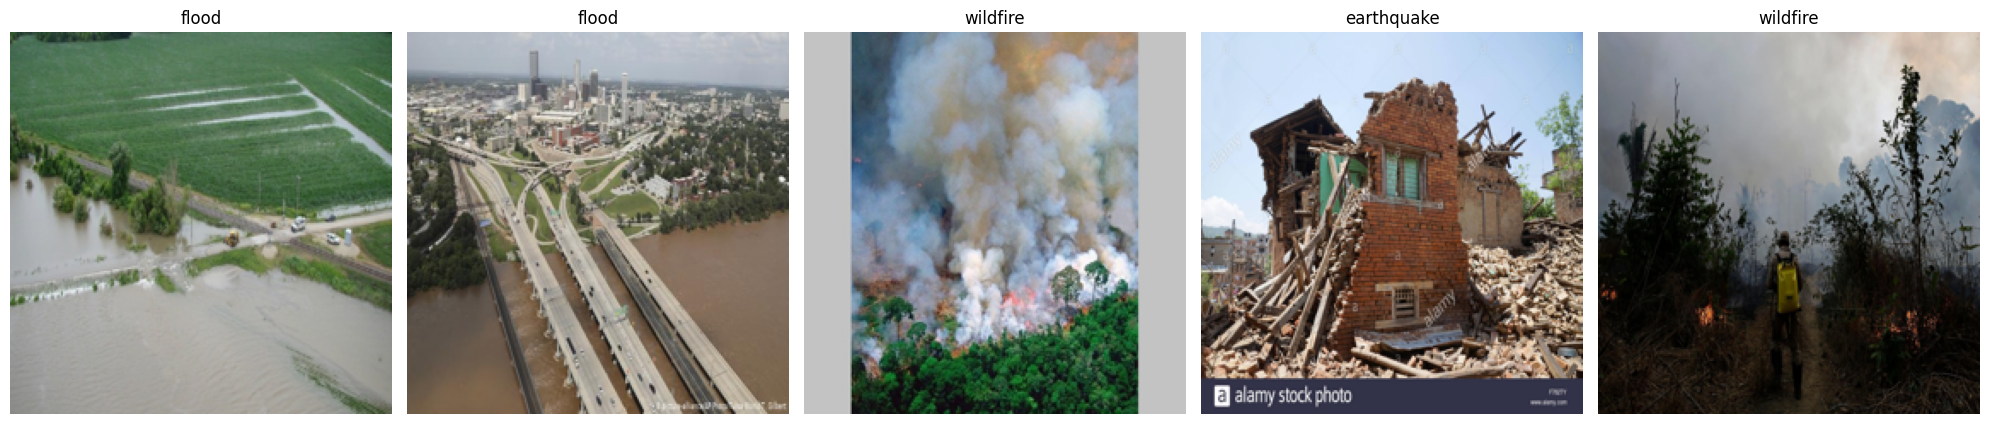

In [22]:
num_images = min(num_images, len(images))
fig, axes = plt.subplots(1, num_images, figsize = (20, 6))
if num_images == 1:
    axes = [axes]
for i in range(num_images):
    idx = random.randint(0, len(images) - 1)
    axes[i].imshow(images[idx])
    axes[i].axis('off')
    axes[i].set_title(f"{labels[idx]}")
plt.tight_layout()
plt.show()

In [23]:
visualize_random_images(images, labels)

if len(images) > 0:
    print(f"\nImage Shape:{images[0].shape}")
    print(f"Data Type: {images[0].dtype}")
    print(f"The Min Pixels Value:{images[0].min()}")
    print(f"The Max Pixels Value:{images[0].max()}")
else:
    print(f"\n No Images loaded to display Information.")


Image Shape:(224, 224, 3)
Data Type: uint8
The Min Pixels Value:0
The Max Pixels Value:255


In [24]:
len(labels)

2400

In [25]:
len(images)

2400

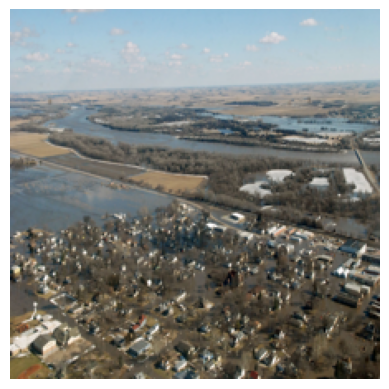

In [26]:
plt.imshow(images[0])
plt.axis('off')
plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 43)

In [28]:
len(X_train), len(X_test)

(1920, 480)

In [29]:
X_train[0].shape, X_test[0].shape

((224, 224, 3), (224, 224, 3))

In [30]:
model = models.Sequential()

In [31]:
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

In [32]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(4, activation = 'softmax'))

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,359,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,452,868 (9.36 MB)

 Trainable params: 2,452,868 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load pre-trained VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)  # Increased the number of units
x = layers.Dropout(0.5)(x)  # Added dropout for regularization
predictions = layers.Dense(4, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=predictions)

# Unfreeze some of the convolutional layers in the base model
for layer in base_model.layers[:15]:  # Fine-tuning the last 15 layers
    layer.trainable = False

for layer in base_model.layers[15:]:
    layer.trainable = True

# Compile the model with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)  # Adjust learning rate
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [35]:
import numpy as np

# Convert lists to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [36]:
# Convert to appropriate types
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [37]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [38]:

# Train the model with more epochs
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=20,  # Increased number of epochs
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),  # Early stopping
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)  # Learning rate scheduler
    ]
)


Epoch 1/20


2024-10-18 09:08:28.067265: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.63498, expected 3.85968
2024-10-18 09:08:28.067317: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.55784, expected 5.78254
2024-10-18 09:08:28.067327: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.61282, expected 5.83752
2024-10-18 09:08:28.067337: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.34499, expected 5.56968
2024-10-18 09:08:28.067344: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 7: 6.25159, expected 5.47629
2024-10-18 09:08:28.067352: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.43964, expected 4.66434
2024-10-18 09:08:28.067360: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 6.54333, expected 5.76803
2024-10-18 09:08:28.067368: E external/local_xla/xla/se

 2/60 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.3906 - loss: 1.5966  

I0000 00:00:1729242525.543080      70 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


60/60 ━━━━━━━━━━━━━━━━━━━━ 43s 322ms/step - accuracy: 0.6045 - loss: 0.9536 - val_accuracy: 0.7083 - val_loss: 27.7503 - learning_rate: 1.0000e-04
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 295ms/step - accuracy: 0.8829 - loss: 0.3496 - val_accuracy: 0.6604 - val_loss: 83.5016 - learning_rate: 1.0000e-04
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 304ms/step - accuracy: 0.9280 - loss: 0.2277 - val_accuracy: 0.7188 - val_loss: 49.0989 - learning_rate: 1.0000e-04
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 40s 294ms/step - accuracy: 0.9108 - loss: 0.2538 - val_accuracy: 0.7563 - val_loss: 50.3405 - learning_rate: 1.0000e-04
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 296ms/step - accuracy: 0.9322 - loss: 0.2044 - val_accuracy: 0.7125 - val_loss: 82.2871 - learning_rate: 5.0000e-05
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 20s 296ms/step - accuracy: 0.9528 - loss: 0.1216 - val_accuracy: 0.7583 - val_loss: 59.7814 - learning_rate: 5.0000e-05


In [39]:
y_pred_prob = model.predict(X_test)

y_pred = np.argmax(y_pred_prob, axis = 1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


In [40]:
cm = confusion_matrix(y_test, y_pred)

print(cm)


[[113   4   1   0]
 [  1 124   1   0]
 [  0  32  78   0]
 [ 23  59  19  25]]


In [41]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy))


Accuracy: 0.71%


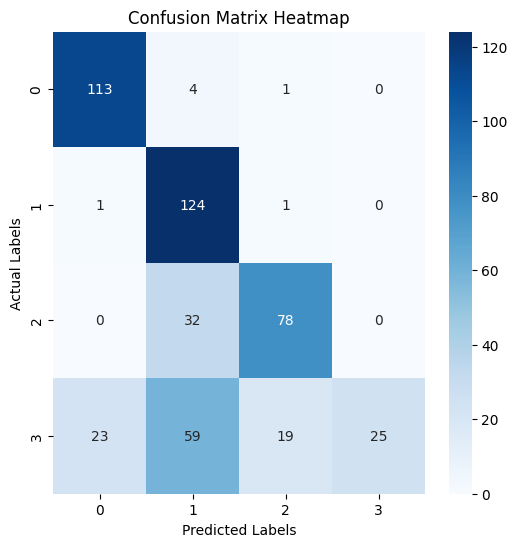

In [42]:
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')

plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()